In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#the dataframe has 45211 entries and 17 columns
#there are 17 columns with 7 int64 dtype and 10 object dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Pre Processing

## Duplicate

In [6]:
df.duplicated(subset='age balance job marital education default housing loan'.split()).sum()

4163

In [7]:
df.drop_duplicates(subset='age balance job marital education default housing loan'.split(), inplace=True)
df.duplicated(subset='age balance job marital education default housing loan'.split()).sum()

0

## Replace Unknown with mode value for job, education, and contact columns

In [8]:
#lakukan imputasi/replace nilai modus pada kolom job, education, dan contact yang memiliki nilai 'unknown'
col='job education contact'.split()
#replace kolom job
for i in col:
  df[i]=df[i].replace(['unknown'],df[i].mode()[0])

*Untuk kolom poutcome, nilai 'unknown' dibiarkan saja karena nantinya kolom poutcome akan didrop karena dinilai memiliki potensi redundant dengan kolom pdays*

## Outliers

In [9]:
#handle with z score
from scipy import stats
import numpy as np

In [10]:
nums = ['age','balance','day','duration','campaign','pdays','previous']

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 41048
Jumlah baris setelah memfilter outlier: 36208


## Data Transformation

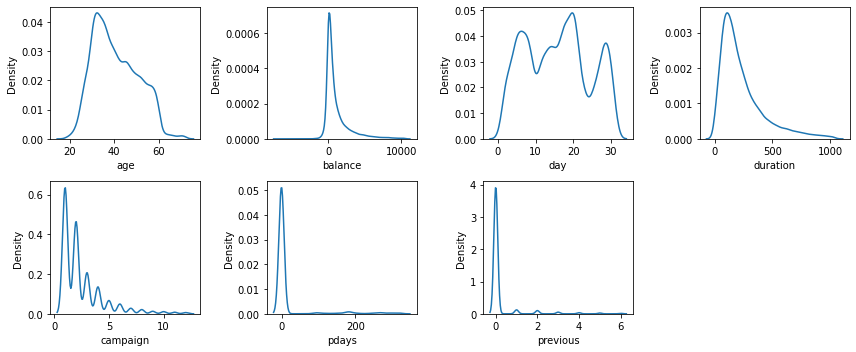

In [12]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

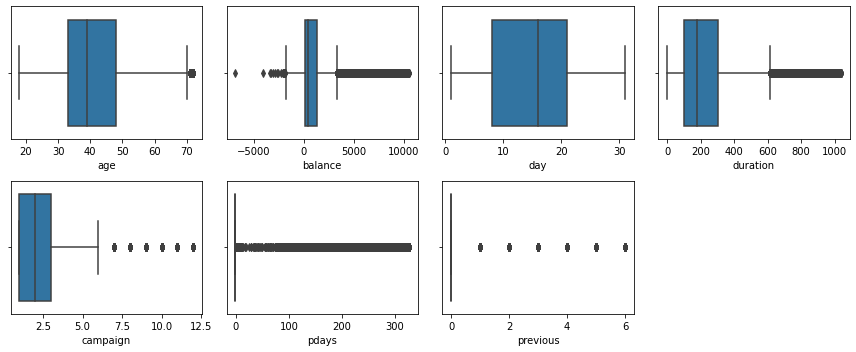

In [13]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

In [14]:
# kita tranformasi fitur yang akan dipakai
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#log transform data skewed
df['age'] = np.log(df['age'])
df['campaign'] = np.log(df['campaign'])
#df['balance'] = np.log(df['balance']) #menurun hasilnya
#df['duration'] = np.log(df['duration']) #menurun hasilnya

df['age_std'] = StandardScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['balance_std'] = StandardScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['day_std'] = StandardScaler().fit_transform(df['day'].values.reshape(len(df), 1))
df['duration_std'] = StandardScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['campaign_std'] = StandardScaler().fit_transform(df['campaign'].values.reshape(len(df), 1))
df['previous'] = StandardScaler().fit_transform(df['previous'].values.reshape(len(df), 1))
df['pdays'] = StandardScaler().fit_transform(df['pdays'].values.reshape(len(df), 1))

df = df.drop(columns=['age', 'day', 'campaign', 'balance', 'duration'])

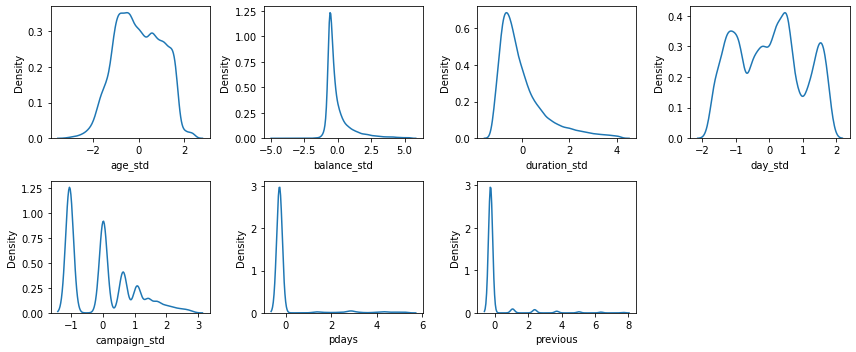

In [15]:
nums_trans_check = ['age_std', 'balance_std', 'duration_std','day_std', 'campaign_std', 'pdays', 'previous']
features = nums_trans_check
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

In [16]:
df.describe()

,pdays,previous,age_std,balance_std,day_std,duration_std,campaign_std
count,3.620800e+04,3.620800e+04,3.620800e+04,3.620800e+04,3.620800e+04,3.620800e+04,3.620800e+04
mean,-2.511861e-17,-7.535584e-17,-4.332961e-16,-2.197879e-17,-1.067541e-16,-5.651688e-17,-4.395757e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.732592e-01,-2.502482e-01,-3.163048e+00,-4.599733e+00,-1.773944e+00,-1.227122e+00,-1.039446e+00
25%,-2.732592e-01,-2.502482e-01,-7.214311e-01,-5.863458e-01,-9.374913e-01,-6.924022e-01,-1.039446e+00
50%,-2.732592e-01,-2.502482e-01,-4.850910e-02,-3.749930e-01,1.845466e-02,-3.082347e-01,2.036016e-02
75%,-2.732592e-01,-2.502482e-01,7.878973e-01,1.554156e-01,6.159209e-01,3.666540e-01,6.403068e-01
max,5.338969e+00,7.671348e+00,2.421179e+00,5.468767e+00,1.810853e+00,4.161605e+00,2.759918e+00


## Feature Encoding

In [17]:
cats = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
nums = ['age','balance','day','duration','campaign','pdays','previous']

### Label Encoding

In [18]:
mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1,
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

df['default'] = df['default'].map(mapping_default)
df['housing'] = df['housing'].map(mapping_housing)
df['loan'] = df['loan'].map(mapping_loan)
df['y'] = df['y'].map(mapping_y)

### One Hot Encoding

In [19]:
for cat in ['job', 'marital','contact','month','education','poutcome']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [20]:
df = df.drop(columns=['job', 'marital','education','contact','month','poutcome'])

## Split Feature & Target

In [21]:
#feature
X=df.drop(['y'],axis=1)
#X=df['age_std marital_divorced marital_married marital_single contact_cellular contact_telephone balance_std default housing loan duration_std campaign_std'.split()]
#X=df['age_std balance_std default housing loan duration_std campaign_std'.split()]


#target
y=df['y']

In [22]:
#Splitting the data into Train and Test 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36208 entries, 0 to 45209
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   default              36208 non-null  int64  
 1   housing              36208 non-null  int64  
 2   loan                 36208 non-null  int64  
 3   pdays                36208 non-null  float64
 4   previous             36208 non-null  float64
 5   age_std              36208 non-null  float64
 6   balance_std          36208 non-null  float64
 7   day_std              36208 non-null  float64
 8   duration_std         36208 non-null  float64
 9   campaign_std         36208 non-null  float64
 10  job_admin.           36208 non-null  uint8  
 11  job_blue-collar      36208 non-null  uint8  
 12  job_entrepreneur     36208 non-null  uint8  
 13  job_housemaid        36208 non-null  uint8  
 14  job_management       36208 non-null  uint8  
 15  job_retired          36208 non-null 

# Modelling

In [24]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from numpy import arange
from numpy import argmax
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    #eval test model
    
    #Threshold moving for Test Data
    # predict probabilities
    yhat = model.predict_proba(xtest)
    # keep probabilities for the positive outcome only
    probs = yhat[:, 1]
    # define thresholds
    thresholds = arange(0, 1, 0.001)
    # evaluate each threshold
    scores = [roc_auc_score(ytest, to_labels(probs, t)) for t in thresholds]
    # get best threshold
    ix = argmax(scores)

    #Threshold moving for Train Data 
    yhat_train = model.predict_proba(xtrain)
    # keep probabilities for the positive outcome only
    probs_train = yhat_train[:, 1]
    # define thresholds
    thresholds_train = arange(0, 1, 0.001)
    # evaluate each threshold
    scores_train = [roc_auc_score(ytrain, to_labels(probs_train, t)) for t in thresholds_train]
    # get best threshold
    ix_train = argmax(scores_train)
    
    
    #eval test model
    y_pred_proba = model.predict_proba(xtest)
    ypred = np.where( y_pred_proba >= thresholds[ix],1,0 )
    ypred = ypred[:, 1]
    #calculate each parameter for test model
    print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    print('eval test model')
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
    
    #eval train model
    y_pred_proba_train = model.predict_proba(xtrain)
    ypred_train = np.where( y_pred_proba_train >= thresholds[ix_train],1,0 )
    ypred_train = ypred_train[:, 1]
    print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix_train], scores[ix_train]))
    print('eval train model')
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, ypred_train))
    print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_train))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred_train))
    print("AUC: %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))
    
    #Get the confusion matrix
    cf_matrix = confusion_matrix(ytest, ypred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

## Logistics Regression

### Model Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=45)
model.fit(X_train, y_train)

LogisticRegression(random_state=45)

### Prediction

In [27]:
#test prediction
y_pred = model.predict(X_test)

In [28]:
#train prediction
y_pred_train = model.predict(X_train)

### Evaluation

Threshold=0.077, F-Score=0.83188
eval test model
Accuracy (Test Set): 0.80
Precision (Test Set): 0.29
Recall (Test Set): 0.87
F1-Score (Test Set): 0.43
AUC: 0.90
Threshold=0.078, F-Score=0.83130
eval train model
Accuracy (Train Set): 0.81
Precision (Train Set): 0.30
Recall (Train Set): 0.85
F1-Score (Train Set): 0.45
AUC: 0.90


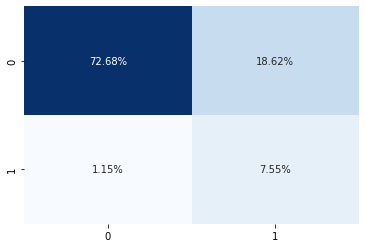

In [29]:
eval_classification(model, X_train, y_train, X_test, y_test)

### Tuning Hyperparameter

Threshold=0.077, F-Score=0.83140
eval test model
Accuracy (Test Set): 0.80
Precision (Test Set): 0.29
Recall (Test Set): 0.87
F1-Score (Test Set): 0.43
AUC: 0.90
Threshold=0.076, F-Score=0.83122
eval train model
Accuracy (Train Set): 0.81
Precision (Train Set): 0.30
Recall (Train Set): 0.86
F1-Score (Train Set): 0.45
AUC: 0.90


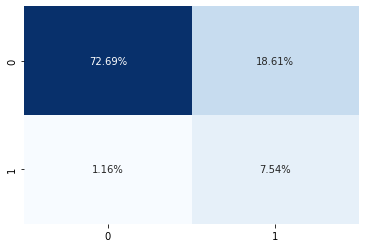

In [30]:
from sklearn.model_selection import RandomizedSearchCV
#hyperparameter tuning using randomized search

penalty = ['l2','l1','elasticnet']
C = [float(x) for x in np.linspace(0.01, 10, num=100)]
max_iter = [int(x) for x in np.linspace(250, 750, num=100)]

hyperparams = dict(penalty=penalty, C=C, max_iter=max_iter)

lr = LogisticRegression(random_state=45)
rs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='precision', random_state=45)
rs.fit(X_train, y_train)
eval_classification(rs, X_train, y_train, X_test, y_test)

In [31]:
print('Train score: ' + str(rs.score(X_train, y_train)))
print('Test score:' + str(rs.score(X_test, y_test)))

Train score: 0.5752930568079351
Test score:0.5865168539325842


### Feature Importance 

In [32]:
rs.best_estimator_.get_params()

{'C': 2.028181818181818,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 270,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 45,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
c=rs.best_estimator_.get_params()['C']
maxiter=rs.best_estimator_.get_params()['max_iter']
maxiter

270

In [34]:
list(X.columns)

['default',
 'housing',
 'loan',
 'pdays',
 'previous',
 'age_std',
 'balance_std',
 'day_std',
 'duration_std',
 'campaign_std',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

Threshold=0.077, F-Score=0.83140
eval test model
Accuracy (Test Set): 0.80
Precision (Test Set): 0.29
Recall (Test Set): 0.87
F1-Score (Test Set): 0.43
AUC: 0.90
Threshold=0.076, F-Score=0.83122
eval train model
Accuracy (Train Set): 0.81
Precision (Train Set): 0.30
Recall (Train Set): 0.86
F1-Score (Train Set): 0.45
AUC: 0.90


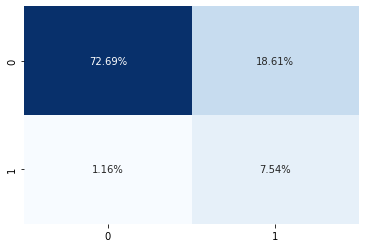

In [35]:
lr = LogisticRegression(random_state=45, C=c, max_iter=maxiter)
lr.fit(X_train, y_train)
eval_classification(lr, X_train, y_train, X_test, y_test)

In [36]:
w=lr.coef_[0]
w

array([ 1.48074587e-01, -9.04013200e-01, -4.96435047e-01, -1.51208682e-01,
        8.42243148e-02, -9.28534273e-02,  6.55551749e-02, -4.97100876e-04,
        1.10186260e+00, -2.43648734e-01,  1.43088756e-01, -1.77293552e-01,
       -3.42769031e-01, -2.88464110e-01,  2.14400333e-02,  4.39608235e-01,
       -1.82940914e-01, -1.16296032e-01,  6.24120762e-01,  3.47430888e-02,
       -1.58936010e-01,  1.17601469e-01, -1.78609316e-01,  5.73090718e-02,
       -1.26105838e-01,  1.22407064e-01,  2.88072277e-01, -7.31592639e-01,
        1.02043551e+00, -7.00149671e-02, -1.30948587e+00, -9.10838006e-01,
       -5.18807068e-01,  2.01129824e+00, -9.70616824e-01, -8.40964777e-01,
        1.01579028e+00,  1.01302507e+00, -2.27709822e-01, -2.17601895e-02,
        2.45771237e-01, -5.80019123e-01, -3.10352566e-01,  1.81741650e+00,
       -9.30743583e-01])

In [37]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['weight_value']=w

In [38]:
feature_importance

,feature,weight_value
0,default,0.148075
1,housing,-0.904013
2,loan,-0.496435
3,pdays,-0.151209
4,previous,0.084224
5,age_std,-0.092853
6,balance_std,0.065555
7,day_std,-0.000497
8,duration_std,1.101863
9,campaign_std,-0.243649


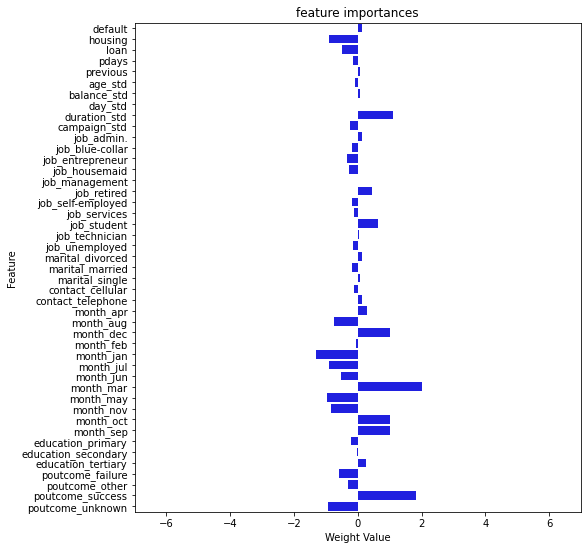

In [39]:
#feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,9))

sns.barplot(x='weight_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('Weight Value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
axes.set_xlim(-7, 7)
plt.show()

In [40]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['change_to_pred_value']=pow(math.e, w)

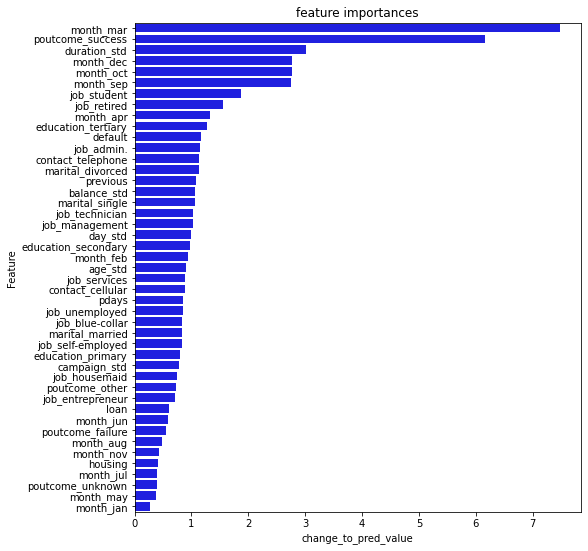

In [41]:
feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,9))

sns.barplot(x='change_to_pred_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('change_to_pred_value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

## Decision Tree

### Model Evaluation

Threshold=0.001, F-Score=0.67227
eval test model
Accuracy (Test Set): 0.89
Precision (Test Set): 0.37
Recall (Test Set): 0.41
F1-Score (Test Set): 0.39
AUC: 0.67
Threshold=0.001, F-Score=0.67227
eval train model
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
AUC: 1.00


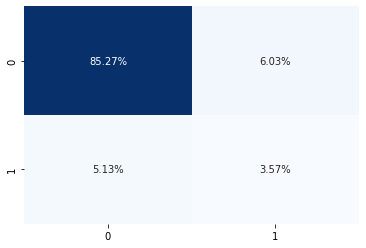

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

In [43]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.8884286108809721


### Hyperparameter Tuning

Threshold=0.104, F-Score=0.80164
eval test model
Accuracy (Test Set): 0.78
Precision (Test Set): 0.26
Recall (Test Set): 0.83
F1-Score (Test Set): 0.40
AUC: 0.87
Threshold=0.089, F-Score=0.79906
eval train model
Accuracy (Train Set): 0.77
Precision (Train Set): 0.27
Recall (Train Set): 0.87
F1-Score (Train Set): 0.41
AUC: 0.89


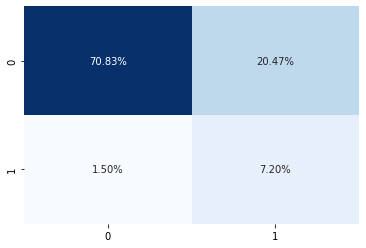

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=10, random_state=42, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

In [45]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 34
Best min_samples_split: 200
Best min_samples_leaf: 50
Best max_features: sqrt


### Feature Importance

In [46]:
model.best_estimator_.feature_importances_

array([0.00000000e+00, 9.48991790e-02, 1.87736585e-03, 5.69819759e-02,
       0.00000000e+00, 9.05230355e-02, 2.51028700e-02, 1.18032445e-02,
       5.54408253e-01, 9.56241144e-03, 1.40340664e-03, 1.07826302e-03,
       1.80786419e-04, 0.00000000e+00, 8.11846648e-06, 0.00000000e+00,
       0.00000000e+00, 2.52860522e-05, 0.00000000e+00, 6.66669969e-04,
       1.88017740e-04, 1.34842621e-03, 4.10439993e-03, 5.31951656e-03,
       0.00000000e+00, 2.06569834e-05, 3.31447286e-02, 1.00260625e-02,
       0.00000000e+00, 5.91029156e-03, 1.66200872e-03, 6.25094107e-04,
       1.56589580e-03, 0.00000000e+00, 1.54332202e-03, 1.13858094e-03,
       3.53874836e-02, 1.52968794e-02, 1.01505095e-03, 6.39472098e-04,
       5.42562811e-03, 2.71176184e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

Text(0.5, 1.0, 'feature importance score')

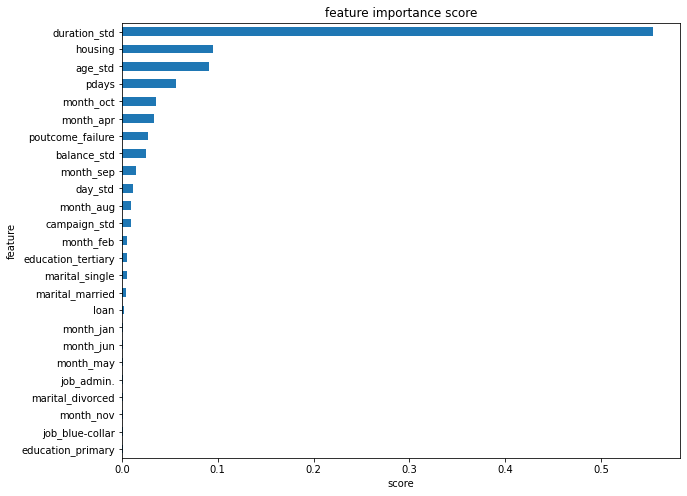

In [47]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Tree Visualization 

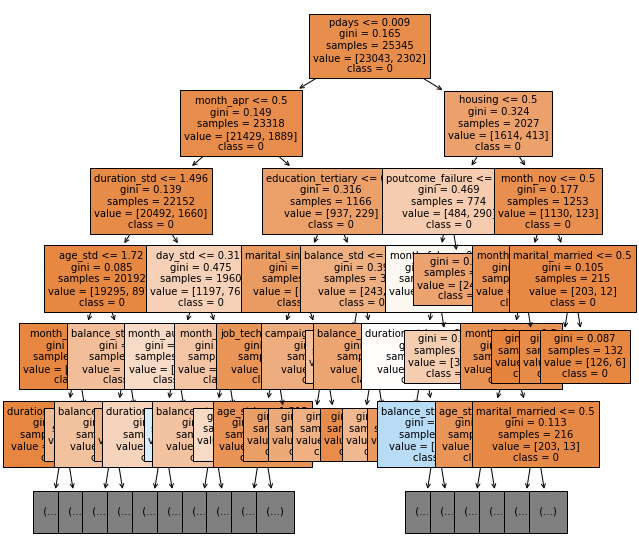

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

## XGboost

### Model Evaluation

Threshold=0.091, F-Score=0.84549
eval test model
Accuracy (Test Set): 0.85
Precision (Test Set): 0.35
Recall (Test Set): 0.84
F1-Score (Test Set): 0.49
AUC: 0.92
Threshold=0.174, F-Score=0.82124
eval train model
Accuracy (Train Set): 0.93
Precision (Train Set): 0.59
Recall (Train Set): 0.94
F1-Score (Train Set): 0.72
AUC: 0.99


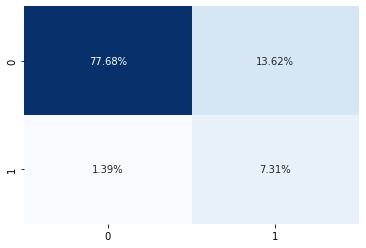

In [49]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

xg = XGBClassifier(eval_metric='logloss')
xg.fit(X_train, y_train)
eval_classification(xg,X_train, y_train, X_test, y_test)

### Hyperparameter Tuning

Threshold=0.093, F-Score=0.85282
eval test model
Accuracy (Test Set): 0.83
Precision (Test Set): 0.33
Recall (Test Set): 0.88
F1-Score (Test Set): 0.47
AUC: 0.92
Threshold=0.084, F-Score=0.84959
eval train model
Accuracy (Train Set): 0.83
Precision (Train Set): 0.34
Recall (Train Set): 0.92
F1-Score (Train Set): 0.50
AUC: 0.94


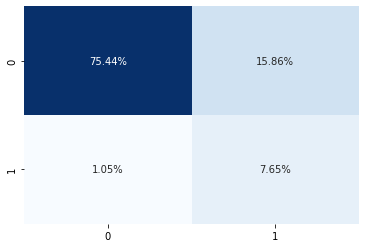

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
learning_rate = [0.001,0.01,0.1,0.25,0.5,0.4]
max_depth = [1, 3, 5, 7, 9, 11] # Maximum number of levels in tree # Number of features to consider at every split
gamma=[float(x) for x in np.linspace(0, 1, num = 5)]
tree_method=['auto', 'exact', 'approx', 'hist']
reg_alpha=[float(x) for x in np.linspace(0, 1, num = 5)]
reg_lambda =[float(x) for x in np.linspace(0, 1, num = 5)]
colsample_bytree = [float(x) for x in np.linspace(0, 1, num = 5)]
min_child_weight = [int(x) for x in np.linspace(1, 20, num = 5)]
n_estimators=[100, 150, 200]
seed = [0]

hyperparameters = dict(learning_rate=learning_rate, 
                       max_depth=max_depth,
                       gamma = gamma,
                       tree_method = tree_method,
                       reg_alpha = reg_alpha,
                       reg_lambda = reg_lambda,
                       colsample_bytree = colsample_bytree,
                       min_child_weight = min_child_weight,
                       #n_estimators=n_estimators,
                       seed = seed
                      )

# Inisialisasi Model
xgtune = XGBClassifier(random_state=42, eval_metric='logloss')
model = RandomizedSearchCV(xgtune, hyperparameters, cv=10, random_state=42, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

In [51]:
model.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'gamma': 1.0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0.75,
 'reg_lambda': 1.0,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'approx',
 'validate_parameters': 1,
 'verbosity': None,
 'seed': 0}

### Confusion Matrix

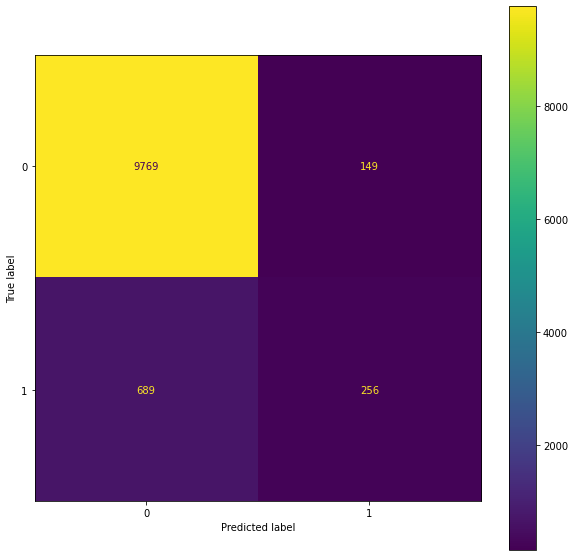

In [52]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(model,X_test,y_test,ax=ax)

In [53]:
df= pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [54]:
#lakukan imputasi/replace nilai modus pada kolom job, education, dan contact yang memiliki nilai 'unknown'
col='job education contact'.split()
#replace kolom job
for i in col:
  df[i]=df[i].replace(['unknown'],df[i].mode()[0])

In [55]:
mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1,
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

df['default'] = df['default'].map(mapping_default)
df['housing'] = df['housing'].map(mapping_housing)
df['loan'] = df['loan'].map(mapping_loan)
df['y'] = df['y'].map(mapping_y)

In [56]:
for cat in ['job', 'marital','contact','month','education','poutcome']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [57]:
df = df.drop(columns=['job', 'marital','education','contact','month','poutcome'])

In [58]:
#feature
X=df.drop(['y'],axis=1)
#X=df['age_std marital_divorced marital_married marital_single contact_cellular contact_telephone balance_std default housing loan duration_std campaign_std'.split()]
#X=df['age_std balance_std default housing loan duration_std campaign_std'.split()]


#target
y=df['y']

In [59]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [60]:
ypred=model.predict(X)
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [61]:
ypred=pd.DataFrame(ypred)
ypred

,0
0,0
1,0
2,0
3,0
4,0
...,...
45206,0
45207,0
45208,1
45209,0


In [62]:
ypred.value_counts()

0    37194
1     8017
dtype: int64

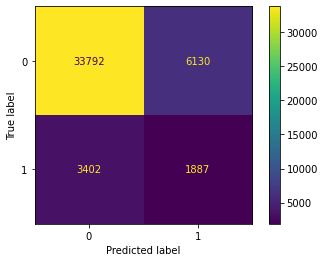

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(y, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [64]:
df['campaign*duration']=df['campaign']*df['duration']

In [65]:
#campaign duration before machine learnig model implemented
df['campaign*duration'].describe()

count    45211.000000
mean       646.051315
std       1094.747093
min          0.000000
25%        176.000000
50%        344.000000
75%        706.000000
max      60170.000000
Name: campaign*duration, dtype: float64

In [66]:
sum(df['campaign*duration'])

29208626

In [67]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_nov,month_oct,month_sep,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,1,0,0,0,0,1


In [68]:
X['y']=ypred

In [69]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_oct,month_sep,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


In [70]:
X['campaign*duration']=X['campaign']*X['duration']

In [71]:
X.groupby('y')[['campaign*duration']].agg('sum')

,campaign*duration
y,
0,25116123
1,4092503


In [72]:
a=X['y']==1
X['y'][a].value_counts()

1    8017
Name: y, dtype: int64

In [73]:
sum(X['campaign*duration'][a])

4092503

In [74]:
#after implemented model
sum(X['campaign*duration'][a])*21.2/10**6

86.7610636

In [75]:
#before implemented model
sum(df['campaign*duration'])*21.2/10**6

619.2228711999999

In [76]:
#selisih cost
sum(df['campaign*duration'])*21.2/10**6 - sum(X['campaign*duration'][a])*21.2/10**6 #jutarupiah

532.4618075999999

In [77]:
#cost before implemented model #CPA total pengeluaran marketing dibagi dengan total customer yang subscribe deposit
(sum(df['campaign*duration'])*21.2/10**3)/5289#ribu rupiah/ 

117.07749502741538

In [78]:
#cost afer implemented model
(sum(X['campaign*duration'][a])*21.2/10**3)/4127#ribu rupiah

21.022792246183666

## KNN

### Model Evaluation

Threshold=0.001, F-Score=0.77404
eval test model
Accuracy (Test Set): 0.82
Precision (Test Set): 0.29
Recall (Test Set): 0.72
F1-Score (Test Set): 0.41
AUC: 0.79
Threshold=0.001, F-Score=0.77404
eval train model
Accuracy (Train Set): 0.87
Precision (Train Set): 0.41
Recall (Train Set): 1.00
F1-Score (Train Set): 0.58
AUC: 0.96


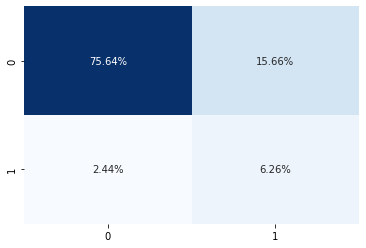

In [79]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()


knn = KNeighborsClassifier(algorithm='auto')
#knn = KNeighborsClassifier(n_neighbors=120)

knn_model = knn.fit(X_train, np.ravel(y_train))
eval_classification(knn_model, X_train, y_train, X_test, y_test)

### Hyperparameter Tuning

In [80]:
train_score = []
test_score = []

values = [int(x) for x in np.linspace(1, 170, num=15)]

from sklearn.neighbors import KNeighborsClassifier
for x in values:
    model = KNeighborsClassifier(algorithm='auto', n_neighbors=x)
    model.fit(X_train, np.ravel(y_train))
    
    # eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval train
    y_pred_proba_train = model.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

k: 1; auc(train): 1.0; auc(test): 0.6285099722486293
k: 13; auc(train): 0.9379608281921311; auc(test): 0.8509799936196387
k: 25; auc(train): 0.925437410804482; auc(test): 0.8697759191507932
k: 37; auc(train): 0.9187704187536216; auc(test): 0.8789654532243765
k: 49; auc(train): 0.9140059816398104; auc(test): 0.8829611278088794
k: 61; auc(train): 0.9116073760486995; auc(test): 0.8853345581919891
k: 73; auc(train): 0.9087060085188824; auc(test): 0.8863447464980032
k: 85; auc(train): 0.906131929227015; auc(test): 0.8880730988817298
k: 97; auc(train): 0.9043893611358479; auc(test): 0.8871595229026162
k: 109; auc(train): 0.9030968921360447; auc(test): 0.8870391709371344
k: 121; auc(train): 0.9012728177551033; auc(test): 0.8861092706222772
k: 133; auc(train): 0.8997989838285564; auc(test): 0.8852661666938738
k: 145; auc(train): 0.8985727604867311; auc(test): 0.8844563516069868
k: 157; auc(train): 0.8972896137629295; auc(test): 0.8843053248276075
k: 170; auc(train): 0.8962047327149827; auc(tes

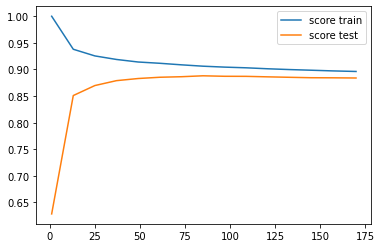

In [81]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
#ax.set_xlabel('age, balance, day, duration, campaign, previous, loans, housings,\n contact_cellular, contact_telephone, contact_unknown')

plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

Threshold=0.077, F-Score=0.81880
eval test model
Accuracy (Test Set): 0.80
Precision (Test Set): 0.28
Recall (Test Set): 0.84
F1-Score (Test Set): 0.42
AUC: 0.88
Threshold=0.064, F-Score=0.81756
eval train model
Accuracy (Train Set): 0.78
Precision (Train Set): 0.28
Recall (Train Set): 0.88
F1-Score (Train Set): 0.42
AUC: 0.90


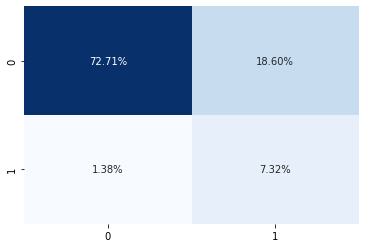

In [82]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()

knn = KNeighborsClassifier(algorithm='auto', n_neighbors=157)

knn_model = knn.fit(X_train, np.ravel(y_train))
eval_classification(knn_model, X_train, y_train, X_test, y_test)

## Random Forest

### Model Evaluation

Threshold=0.121, F-Score=0.84914
eval test model
Accuracy (Test Set): 0.84
Precision (Test Set): 0.34
Recall (Test Set): 0.86
F1-Score (Test Set): 0.49
AUC: 0.91
Threshold=0.381, F-Score=0.70564
eval train model
Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
AUC: 1.00


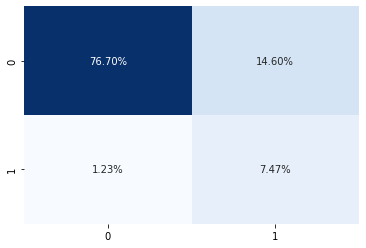

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
eval_classification(rf_model, X_train, y_train, X_test, y_test)

### Hyperparameter Tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

hyperparameters=dict(
                    n_estimators = [40,50,60,70,80,90,100,120,150,200],
                    criterion = ['gini', 'entropy'],
                    max_depth = [9,10,11,12,13],
                    min_samples_split = [int(x) for x in np.linspace(2,40, num=40)],
                    min_samples_leaf = [int(x) for x in np.linspace(2,20, num=20)],
                    max_features = ['auto','sqrt','log2'],
                    )

rf = RandomForestClassifier()
model = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=10, scoring='roc_auc',error_score='raise')
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 10, 11, 12, 13],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100, 120, 150, 200]},
                   random_state=42, scoring='roc_auc')

Threshold=0.110, F-Score=0.84770
eval test model
Accuracy (Test Set): 0.81
Precision (Test Set): 0.30
Recall (Test Set): 0.89
F1-Score (Test Set): 0.45
AUC: 0.91
Threshold=0.108, F-Score=0.84677
eval train model
Accuracy (Train Set): 0.83
Precision (Train Set): 0.33
Recall (Train Set): 0.92
F1-Score (Train Set): 0.49
AUC: 0.94


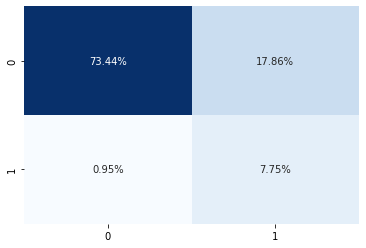

In [85]:
# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

In [86]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 14,
 'min_samples_split': 26,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Feature Importance

In [87]:
feature = pd.DataFrame(data = rf_model.feature_importances_,
                       index= X_train.columns.tolist()).reset_index()

<AxesSubplot:xlabel='0', ylabel='index'>

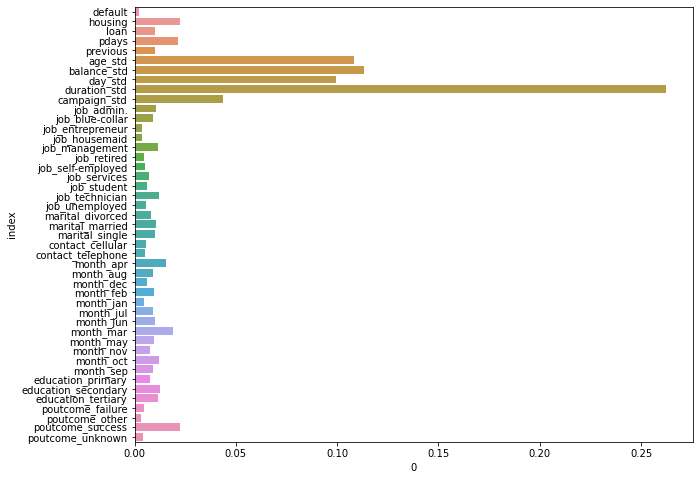

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(y=feature['index'],x=feature[0],data=feature,orient='h')